In [1]:
import pandas as pd
import numpy as np

import os
import sys
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans

sns.set(style="darkgrid")

In [2]:
cc_data = pd.read_excel('default of credit card clients.xls', skiprows=[0])
cc_data.set_index(['ID'], inplace=True)
print (cc_data.shape)

(30000, 24)


In [3]:
cc_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
cc_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
####

In [6]:
ad_data = pd.read_csv('adult.data.txt')
ad_data.shape

(32560, 15)

In [7]:
ad_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# normalize data
cc_data_norm = cc_data.copy()
cc_data_norm = (cc_data_norm - cc_data_norm.min()) / (cc_data_norm.max() - cc_data_norm.min())

## Clustering
### k-means 

In [9]:
mdata = cc_data_norm.as_matrix()
mdata.shape

(30000, 24)

In [10]:
def explore_labels(labels_list):
    x = labels_list
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    for i in range(len(ii)):
        print ("  cluster %s: %s %%"%(str(ii[i]), str(y[i]/np.sum(y)*100)))
    freq_list = np.vstack((ii,y[ii]))
    alphab = [str(i) for i in freq_list[0]]
    pos = np.arange(len(alphab))
    width = 1.0     # gives histogram aspect to the bar diagram
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(alphab)
    plt.bar(pos, freq_list[1], width, color='b')
    plt.show()

1 Clusters
  cluster 0: 100.0 %


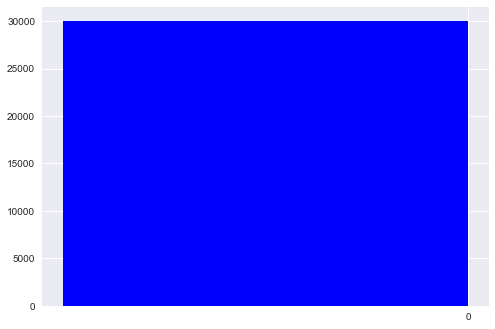

2 Clusters
  cluster 0: 39.6266666667 %
  cluster 1: 60.3733333333 %


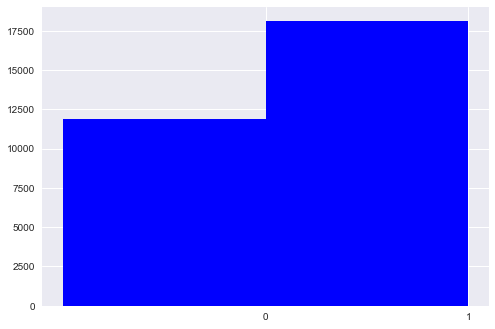

3 Clusters
  cluster 0: 47.83 %
  cluster 1: 22.12 %
  cluster 2: 30.05 %


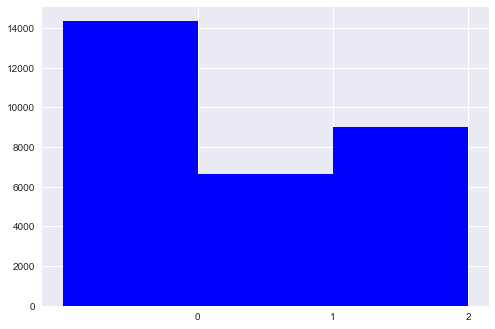

4 Clusters
  cluster 0: 47.83 %
  cluster 1: 30.05 %
  cluster 2: 12.5433333333 %
  cluster 3: 9.57666666667 %


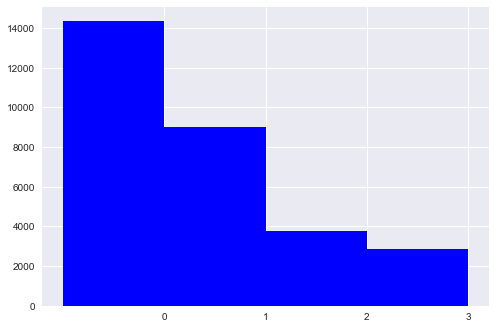

5 Clusters
  cluster 0: 30.05 %
  cluster 1: 25.4566666667 %
  cluster 2: 9.57666666667 %
  cluster 3: 12.5433333333 %
  cluster 4: 22.3733333333 %


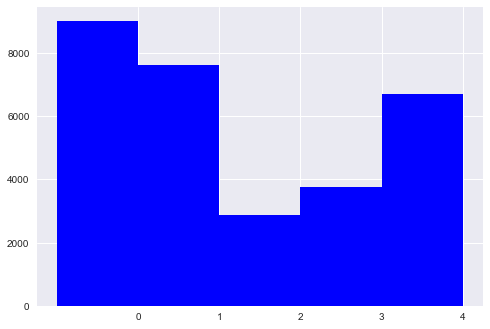

6 Clusters
  cluster 0: 13.1033333333 %
  cluster 1: 25.4566666667 %
  cluster 2: 9.57666666667 %
  cluster 3: 16.9466666667 %
  cluster 4: 22.3733333333 %
  cluster 5: 12.5433333333 %


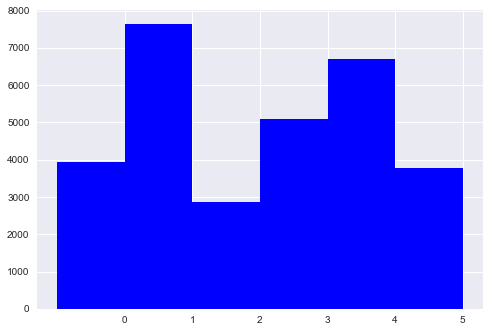

7 Clusters
  cluster 0: 16.9466666667 %
  cluster 1: 15.02 %
  cluster 2: 9.57666666667 %
  cluster 3: 12.5433333333 %
  cluster 4: 19.2666666667 %
  cluster 5: 13.1033333333 %
  cluster 6: 13.5433333333 %


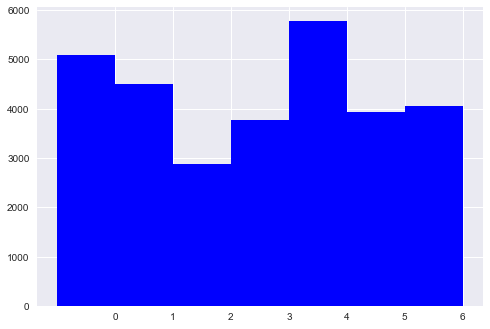

8 Clusters
  cluster 0: 19.24 %
  cluster 1: 5.04333333333 %
  cluster 2: 16.9466666667 %
  cluster 3: 7.5 %
  cluster 4: 9.57666666667 %
  cluster 5: 13.5733333333 %
  cluster 6: 15.0166666667 %
  cluster 7: 13.1033333333 %


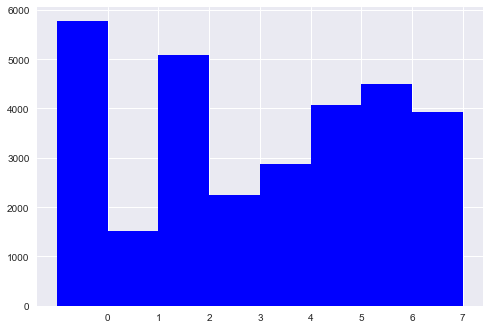

9 Clusters
  cluster 0: 15.03 %
  cluster 1: 13.1766666667 %
  cluster 2: 7.5 %
  cluster 3: 13.52 %
  cluster 4: 9.57666666667 %
  cluster 5: 7.79333333333 %
  cluster 6: 9.08 %
  cluster 7: 5.04333333333 %
  cluster 8: 19.28 %


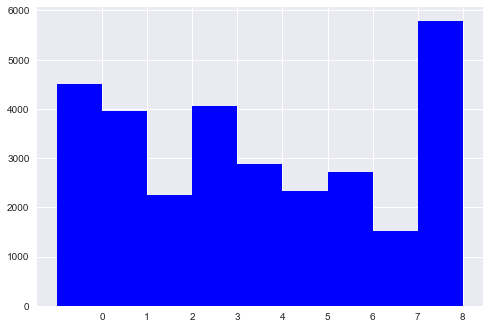

10 Clusters
  cluster 0: 13.6133333333 %
  cluster 1: 9.07 %
  cluster 2: 6.22 %
  cluster 3: 4.11333333333 %
  cluster 4: 13.3033333333 %
  cluster 5: 8.43 %
  cluster 6: 15.0233333333 %
  cluster 7: 19.1933333333 %
  cluster 8: 7.67666666667 %
  cluster 9: 3.35666666667 %


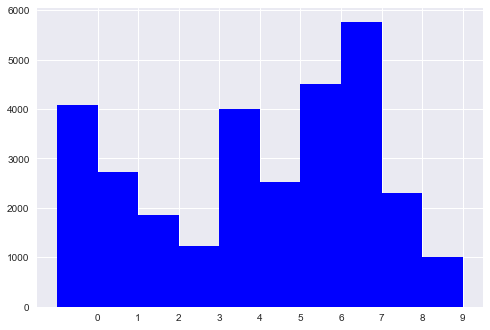

In [11]:
inertia_list=[]
number_of_clusters = 10
for i in range(number_of_clusters):
    kmeans = KMeans(n_clusters=i+1, random_state=0)
    kmeans.fit(mdata)
    #print(kmeans.labels_)
    #print(kmeans.inertia_ )
    print("%s Clusters"%str(i+1))
    inertia_list.append(kmeans.inertia_ )
    explore_labels(kmeans.labels_)

### Inertia plot

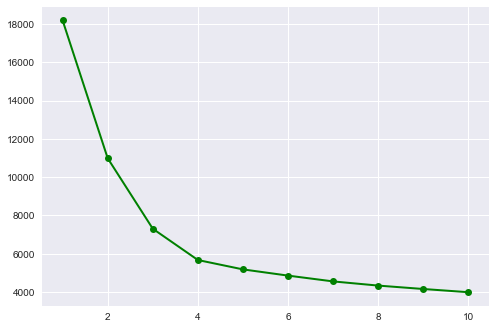

In [12]:
#print(inertia_list)
plt.plot(range(1,len(inertia_list)+1),inertia_list, 'go-', label='inertia', linewidth=2)
plt.show()